### Calculate the shadowing expected from the ropes <br> Doing analytical approximations

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

# Upper half of the sphere

### Hold down ropes

In [11]:
# Number of ropes
nropes = 10
# Spreader cover ~half of the circumference

av_radius = 6075. # in mm
av_inner  = 6005.

rope_radius_off   = 39/2.
rope_radius_aksel = 30/2.
angle_used = 7.6 # For defining what top is

neck_radius = 800.
neck_angle = np.arcsin(neck_radius/av_inner)


In [12]:
# Zone area formula = 2 pi R h
# htop is the neck height at the outer AV
htop = av_radius*np.cos(neck_angle)
h = 0.
area = 2*np.pi*av_radius * (htop-h)
print 'Height (htop)', htop
print 'Area used', area
print 'Area wrt full half sphere', area/(2*np.pi*av_radius**2)

Height (htop) 6020.84853942
Area used 229817900.509
Area wrt full half sphere 0.991086179328


In [13]:
# Now get the shadowing of the ropes

# Rope
rope_length = (av_radius)*np.pi
print 'Rope length', rope_length

Rope length 19085.1753706


In [14]:
def down_rope_shadow(area = area, rope_radius = 19.):
    rope_area = (rope_length*nropes)*2*rope_radius + rope_length*2*10.
    return 1 - rope_area/area

In [15]:
print 'Shadowing ', 1-down_rope_shadow(rope_radius = rope_radius_aksel)

Shadowing  0.0265743273481


### Hold up ropes

In [16]:
# Hold up rope
# Calculating the shadowed angle as function of angle
# The angle goes from 0 to pi/2.
# The result of the function is an angle. Needs to be 
r_rope = 16.5/2.

In [17]:
# Hold up rope; shadowing as fnc of z
upshadow = lambda z: 2*np.arctan(r_rope/np.sqrt(z**2 + av_radius**2))

In [18]:
zlow = 0.
nstrings = 20.
zhigh_list = np.linspace(0., 8400., 301)
r = np.zeros_like(zhigh_list)
for i, zhigh in enumerate(zhigh_list):
    r[i] = 20*integrate.quad(upshadow, zlow, zhigh)[0]


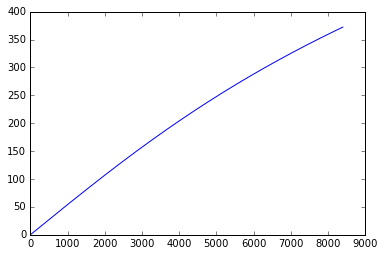

In [19]:
plt.plot(zhigh_list, r)

In [20]:
maxz = av_radius/np.tan(neck_angle)
print maxz

45193.994349


In [21]:
6060./(800./6060.)

45904.50000000001

In [22]:
uprope_shadow = r[-1]/(2*np.pi*(htop))
print uprope_shadow
print uprope_shadow + (1-down_rope_shadow(rope_radius = rope_radius_aksel))

0.00983885913668
0.0364131864848


# The lower half - only hold down ropes

In [23]:
# Hold down rope
# Calculating the shadowed angle as function of angle
# The angle goes from 0 to pi/2.
# The result of the function is an angle
r_rope = 15.

In [24]:
# Hold up rope; shadowing as fnc of z
upshadow = lambda z: 2*np.arctan(r_rope/np.sqrt(z**2 + av_radius**2))

In [25]:
zlow = 0.
nstrings = 20.
zhigh_list = np.linspace(0., 8400., 301)
r = np.zeros_like(zhigh_list)
for i, zhigh in enumerate(zhigh_list):
    r[i] = 20*integrate.quad(upshadow, zlow, zhigh)[0]


Shadowing lower hemisphere 0.0177293588743


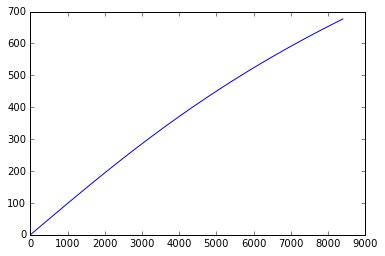

In [26]:
plt.plot(zhigh_list, r)
print 'Shadowing lower hemisphere', r[-1]/(2*np.pi*av_radius)

In [28]:
print 'Estimate of the average shadowing ', (3.6+1.8)/2.

Estimate of the average shadowing  2.7
